**Name: Sparsh Saxena** <br>
**Registration No.: 21BCE6015** <br>
**Slot: L57+L58** <br>
**Lab 4 Assignment Machine Learning** <br>
**Submitted to: Ms. R.Jothi** <br>
**Collab Link :** https://colab.research.google.com/drive/1qtXlByNqMo9JBvf0imEbAygsDfG5PxMP#scrollTo=kN5kirLF579w

In [386]:
!pip install numpy
import pandas as pd
import numpy as np

**1st Question** <br>
Suppose you want to build Naïve Bayes classifier for predicting whether a
cricket match will be played in the given weather conditions or not. Here the
weather conditions are described by features outlook, temperature, humidity and
wind. The target is play with two class labels Yes and No. (Dataset: play.csv)

**1st Question (a) part** <br>
<br> Implement Naïve Bayes classifier which must
<br> -> Print the class prior probabilities form the training set
<br> -> Classify the test sample <Rain, Cool, High, Strong>. Need to print
likelihood for <Rain, Cool, High, Strong> and also class
conditional probabilities for “YES” and “NO” classes.

In [387]:
# Read the dataset
df = pd.DataFrame(pd.read_csv("play.csv"))
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [388]:
# Split the data into features (X) and target variable (y)
x_train = df.iloc[:, 1:5]  # outlook, temp, humidity, wind
y_train = df['play']

In [389]:
# Calculate class prior probabilities
prior_prob_yes = y_train.value_counts()['Yes'] / len(y_train)
prior_prob_no = y_train.value_counts()['No'] / len(y_train)

print("Class Prior Probabilities:")
print("P(Yes):", prior_prob_yes)
print("P(No):", prior_prob_no)

Class Prior Probabilities:
P(Yes): 0.6428571428571429
P(No): 0.35714285714285715


In [390]:
# Classify the test sample <Rain, Cool, High, Strong>
test_sample = ['Rain', 'Cool', 'High', 'Strong']

# Calculate likelihoods
likelihood_yes = 1
likelihood_no = 1

for i in range(len(test_sample)):
  likelihood_yes *= (x_train[y_train == 'Yes'].iloc[:, i].value_counts().get(test_sample[i], 0))/len(x_train[y_train=='Yes'])
  likelihood_no *= (x_train[y_train == 'No'].iloc[:, i].value_counts().get(test_sample[i], 0))/len(x_train[y_train=='No'])


print("\nLikelihood for", test_sample, ":")
print("P(X|Yes):", likelihood_yes)
print("P(X|No):", likelihood_no)

conditional_prob_yes = prior_prob_yes * likelihood_yes
conditional_prob_no = prior_prob_no * likelihood_no
print("\nClass Conditional Probabilities:")
print("P(Yes|X):", conditional_prob_yes)
print("P(No|X):", conditional_prob_no)

if conditional_prob_no > conditional_prob_yes:
  print("\nPrediction for the given test feature : No")
else:
  print("\nPrediction for the given test feature : Yes")


Likelihood for ['Rain', 'Cool', 'High', 'Strong'] :
P(X|Yes): 0.012345679012345678
P(X|No): 0.03840000000000001

Class Conditional Probabilities:
P(Yes|X): 0.007936507936507936
P(No|X): 0.013714285714285719

Prediction for the given test feature : No


**1st Question (b) part**

Use sklearn CategoricalNB to validate the results obtained above.

Data Preprocessing Part

In [391]:
# Checking for unique types of values in the columns of dataset
print("Unique values in the columns: \n")
for col in df.columns:
  print(f"{col}: {df[col].unique()}\n")

# By observation we pass these selected columns through the label encoder
select_cols = ["outlook","temp","humidity","wind","play"]

Unique values in the columns: 

day: ['D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13'
 'D14']

outlook: ['Sunny' 'Overcast' 'Rain']

temp: ['Hot' 'Mild' 'Cool']

humidity: ['High' 'Normal']

wind: ['Weak' 'Strong']

play: ['No' 'Yes']



In [392]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
# Encode labels in columns selected.
for col in select_cols:
  df[col] = lab_enc.fit_transform(df[col])

# Changed dataset
df

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [393]:
df = df.drop("day",axis=1) #drop the day column as it is irrelevant for classification here
df

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


Model Making and Train Test Split

In [394]:
# Applying the built-in CategoricalNB model from sklearn to the dataset.

x_train = df.drop("play",axis=1)
y_train = df["play"]

from sklearn.naive_bayes import CategoricalNB

md = CategoricalNB()
md.fit(x_train,y_train)

CategoricalNB()

Testing the sklearn model for the given test value in part (a)

In [395]:
# Testing sklearn model for the given feature values to predict.

# Labelling for preprocessing of test vector
label_outlook = dict(zip(['Overcast','Rain','Sunny'],[i for i in range(3)]))
label_temp = dict(zip(['Cool','Hot','Mild'],[i for i in range(3)]))
label_humidity = dict(zip(['High','Normal'],[i for i in range(2)]))
label_wind = dict(zip(['Strong','Weak'],[i for i in range(2)]))
label_play = dict(zip([i for i in range(2)],['No','Yes']))

# This is our test vector which we have preprocessed according to our model
pred_array = np.array([label_outlook["Rain"],label_temp["Cool"],label_humidity["High"],label_wind["Strong"]]).reshape(1,-1) # Test vector
# print(pred_array)

# Prediction on the test array using the model trained
prediction = md.predict(pred_array)
print("The prediction for the given test feature vector using sklearn : ",label_play[prediction[0]])

# Probabilites for both classes for our test vector
prob_array = md.predict_proba(pred_array)

print("Conditional Probability for No class: ",prob_array[0][0])
print("Conditional Probability for Yes class: ",prob_array[0][1])
print("\n")

The prediction for the given test feature vector using sklearn :  No
Conditional Probability for No class:  0.5913207793054018
Conditional Probability for Yes class:  0.40867922069459806




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


**2nd Question**

Assume you need to build a classifier to predict the graduate admissions into
global universities for higher studies using parameters such as UG GPA, GRE
score, research expertise, etc. Using the graduate.csv dataset, build a naïve bayes classifier to predict the graduate admissions chances. Report accuracy.

Data Pre-processing Part

In [396]:
dt = pd.DataFrame(pd.read_csv("Graduate.csv"))
dt

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,1


In [397]:
# Checking for null and missing values
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Admit              500 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 35.3 KB


In [398]:
#Checking for duplicated values
dt.duplicated().sum()

0

In [399]:
# Since all the data in the dataset is in numerical format, there is no need for a Label Encoder here.
# So, we move on to the normalization part

dt.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.926000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.262033
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,1.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,1.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [400]:
dt = dt.drop("Serial No.",axis=1) # We require the Serial No. column for neither training nor prediction, so we drop it.

In [401]:
# Normalization of data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dt = pd.DataFrame(scaler.fit_transform(dt),columns=dt.columns)

# Changed dataset
dt

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,1.0
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,1.0


Train Test Split and Model Making

In [402]:
# Train Test Split

from sklearn.model_selection import train_test_split

x = dt.drop("Admit",axis=1)
y = dt["Admit"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42) # We keep 1/3rd of data as test and rest as train

In [403]:
# Model making and training

from sklearn.naive_bayes import GaussianNB

md1 = GaussianNB()
md1.fit(x_train,y_train)

GaussianNB()

Evaluation

In [404]:
# Accuracy score for evaluation

accuracy = md1.score(x_test,y_test)*100
print(f"Accuracy for the Naive Bayes (Gaussian because data was continuous) model made for prediction of admission of students: {accuracy} %")

Accuracy for the Naive Bayes (Gaussian because data was continuous) model made for prediction of admission of students: 88.48484848484848 %


**3rd Question**

Apply K-NN for the graduate admissions problem. Compare accuracy of KNN for different values of K.

Model Making

In [405]:
# Dataset's Pre-Processing and Train-Test Split steps are already done in the GaussianNB model
# part, so we only need to train and test the model here.

from sklearn.neighbors import KNeighborsClassifier

# 3-Neighbours Model
md2 = KNeighborsClassifier(n_neighbors=3)
md2.fit(x_train,y_train)

# 5-Neighbours Model
md3 = KNeighborsClassifier(n_neighbors=5)
md3.fit(x_train,y_train)

# 7-Neighbours Model
md4 = KNeighborsClassifier(n_neighbors=7)
md4.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Evaluation

In [406]:
print("Scores for KNN Models: \n")

accuracy1 = md2.score(x_test,y_test)*100
print(f"Accuracy for the 3-NN model made for prediction of admission of students: {accuracy1} %")

accuracy2 = md3.score(x_test,y_test)*100
print(f"Accuracy for the 5-NN model made for prediction of admission of students: {accuracy2} %")

accuracy3 = md4.score(x_test,y_test)*100
print(f"Accuracy for the 7-NN model made for prediction of admission of students: {accuracy3} %")

Scores for KNN Models: 

Accuracy for the 3-NN model made for prediction of admission of students: 92.12121212121212 %
Accuracy for the 5-NN model made for prediction of admission of students: 92.12121212121212 %
Accuracy for the 7-NN model made for prediction of admission of students: 93.33333333333333 %


**4th Question (Bonus Question)**

Plot the bar chart for target variable in graduate.csv. You may observe the
class imbalance (ie. Class=1 more than Class=0). You may address this problem
either by data augmentation (to create dummy samples for Class=0) or SMOTE
algorithm for imbalance.
Those who show improved accuracy with the above said approached tested with
both naïve bayes and K-NN will get bonus marks.

Bar Plot Making to Understand the Imbalance

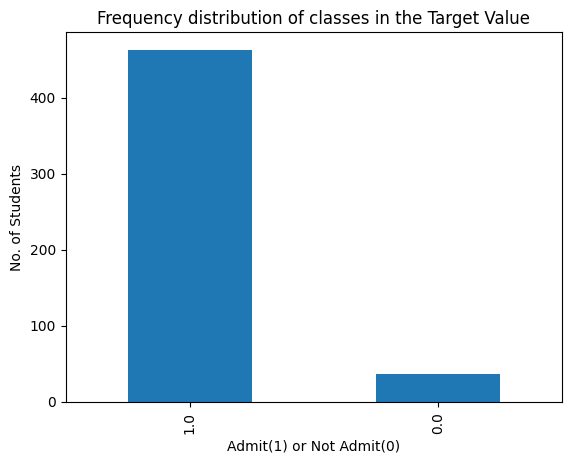

In [407]:
# Bar Plot to understand the inequality in data distribution in whole dataset.

import matplotlib.pyplot as plt

dt["Admit"].value_counts().plot.bar()
plt.title('Frequency distribution of classes in the Target Value')
plt.xlabel("Admit(1) or Not Admit(0)")
plt.ylabel("No. of Students")
plt.show()

SMOTE Correction application to the training set

In [408]:
# I have applied the SMOTE (Synthetic Minority Oversampling Technique) to correct the imbalance in the dataset here.

# Importing the library necessary.
from imblearn.over_sampling import SMOTE

# Our data has already been split into train and test sets so, no need for that.
# We move to the next step i.e. to create the resampled train sets from the ones in Ques. 3.
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

Augmented Values Evidence in the Training Set

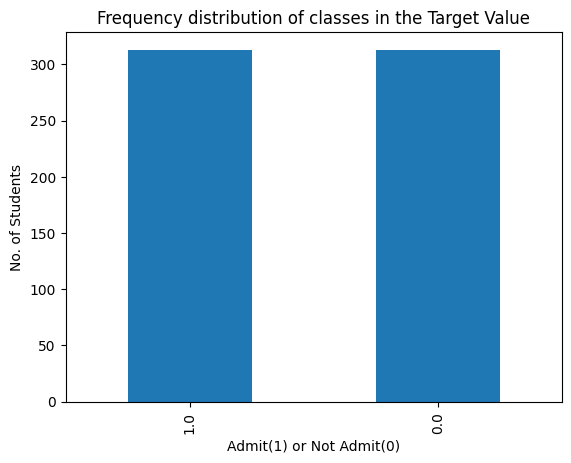

In [409]:
# Lets see the distribution in values in the resampled train set now.
# We will clearly see a big change in the number of values of class 0 here.

import matplotlib.pyplot as plt

y_train_resampled.value_counts().plot.bar()
plt.title('Frequency distribution of classes in the Target Value')
plt.xlabel("Admit(1) or Not Admit(0)")
plt.ylabel("No. of Students")
plt.show()

Training Model on new data and Model Evaluation

In [410]:
# Training our models (named md1 for GaussianNB and md2,md3,md4 for KNN) on new training sets

# GaussianNB
md1.fit(x_train_resampled, y_train_resampled)
# 3-NN
md2.fit(x_train_resampled, y_train_resampled)
# 5-NN
md3.fit(x_train_resampled, y_train_resampled)
# 7-NN
md4.fit(x_train_resampled, y_train_resampled)

# Evaluating using accuracy score
acc1 = md1.score(x_test,y_test)*100
print(f"Accuracy for the Gaussian NB model after SMOTE: {acc1} %")

acc2 = md2.score(x_test,y_test)*100
print(f"Accuracy for the 3-NN model after SMOTE: {acc2} %")

acc3 = md3.score(x_test,y_test)*100
print(f"Accuracy for the 5-NN model after SMOTE: {acc3} %")

acc4 = md4.score(x_test,y_test)*100
print(f"Accuracy for the 7-NN model after SMOTE: {acc4} %")

Accuracy for the Gaussian NB model after SMOTE: 81.21212121212122 %
Accuracy for the 3-NN model after SMOTE: 89.6969696969697 %
Accuracy for the 5-NN model after SMOTE: 87.27272727272727 %
Accuracy for the 7-NN model after SMOTE: 86.06060606060606 %


**Explanation for Reduction in Accuracies** <BR>
We can observe that there is a reduction in accuracies after applying SMOTE because this technique can create unrealistic synthetic samples, affecting accuracy. The impact depends on the dataset and model. A reduction in accuracy here is still better than having a model with bias as it will most likely classify all the test values in the over-sampled class in real-world application.